In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Base_Dados_Magalu')

In [6]:
df.describe()

,Data,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
count,247,247,247,247,247,247,247
unique,247,217,229,225,227,247,228
top,1/4/2021,"23,85","20,21","6,42","21,65",25.706.100,"21,63"
freq,1,3,3,3,3,1,3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Data        247 non-null    object
 1   Maior       247 non-null    object
 2   Menor       247 non-null    object
 3   Abertura    247 non-null    object
 4   Fechamento  247 non-null    object
 5   Volume      247 non-null    object
 6   Adj Close   247 non-null    object
dtypes: object(7)
memory usage: 13.6+ KB


In [9]:
df.duplicated().sum()

0

In [12]:
df.nunique()

Data          247
Maior         217
Menor         229
Abertura      225
Fechamento    227
Volume        247
Adj Close     228
dtype: int64

In [15]:
df.head()

,Data,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
0,1/4/2021,"25,58","24,87","25,26","25,20",25.706.100,"25,18"
1,1/5/2021,"25,18","24,34","25,10","24,76",25.431.900,"24,74"
2,1/6/2021,"24,66","23,42","24,65","23,46",51.799.000,"23,44"
3,1/7/2021,"23,85","22,95","23,64","23,16",42.146.600,"23,14"
4,1/8/2021,"24,30","23,02","23,19","23,84",43.988.100,"23,82"


In [17]:
df['Data'] = pd.to_datetime(df['Data'])
df.head()

,Data,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
0,2021-01-04,"25,58","24,87","25,26","25,20",25.706.100,"25,18"
1,2021-01-05,"25,18","24,34","25,10","24,76",25.431.900,"24,74"
2,2021-01-06,"24,66","23,42","24,65","23,46",51.799.000,"23,44"
3,2021-01-07,"23,85","22,95","23,64","23,16",42.146.600,"23,14"
4,2021-01-08,"24,30","23,02","23,19","23,84",43.988.100,"23,82"


In [ ]:
df['Maior'] = pd.to_numeric(df['Maior'].str.replace(',', '.'))
df['Menor'] = pd.to_numeric(df['Menor'].str.replace(',', '.'))
df['Abertura'] = pd.to_numeric(df['Abertura'].str.replace(',', '.'))
df['Fechamento'] = pd.to_numeric(df['Fechamento'].str.replace(',', '.'))
df['Adj Close'] = pd.to_numeric(df['Adj Close'].str.replace(',', '.'))
df['Volume'] = pd.to_numeric(df['Volume'].str.replace('.', ''))

In [38]:
df.head()

,Data,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
0,2021-01-04,25.58,24.87,25.26,25.20,25706100,25.18
1,2021-01-05,25.18,24.34,25.10,24.76,25431900,24.74
2,2021-01-06,24.66,23.42,24.65,23.46,51799000,23.44
3,2021-01-07,23.85,22.95,23.64,23.16,42146600,23.14
4,2021-01-08,24.30,23.02,23.19,23.84,43988100,23.82


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data        247 non-null    datetime64[ns]
 1   Maior       247 non-null    float64       
 2   Menor       247 non-null    float64       
 3   Abertura    247 non-null    float64       
 4   Fechamento  247 non-null    float64       
 5   Volume      247 non-null    int64         
 6   Adj Close   247 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.6 KB


In [41]:
Dados = df.set_index('Data')
Dados.head()

,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
Data,,,,,,
2021-01-04,25.58,24.87,25.26,25.20,25706100,25.18
2021-01-05,25.18,24.34,25.10,24.76,25431900,24.74
2021-01-06,24.66,23.42,24.65,23.46,51799000,23.44
2021-01-07,23.85,22.95,23.64,23.16,42146600,23.14
2021-01-08,24.30,23.02,23.19,23.84,43988100,23.82


Text(0, 0.5, 'Valor da Ação (R$)')

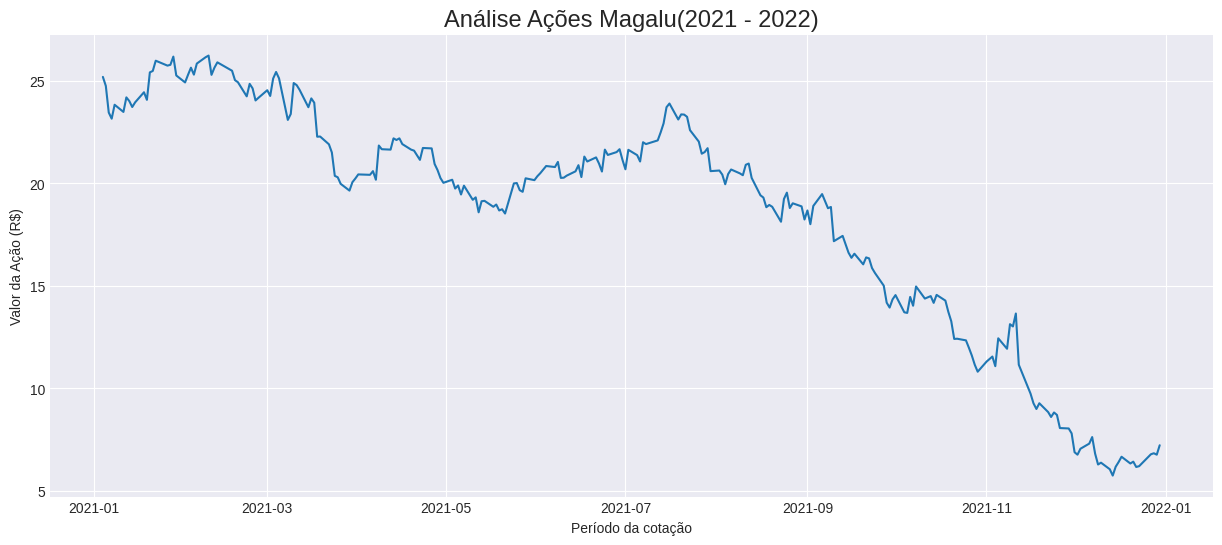

In [53]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15, 6))
plt.plot(Dados.index, Dados['Fechamento'])
plt.title('Análise Ações Magalu(2021 - 2022)', fontsize = 17)
plt.xlabel('Período da cotação')
plt.ylabel('Valor da Ação (R$)')

Text(0, 0.5, 'Valor da Ação (R$)')

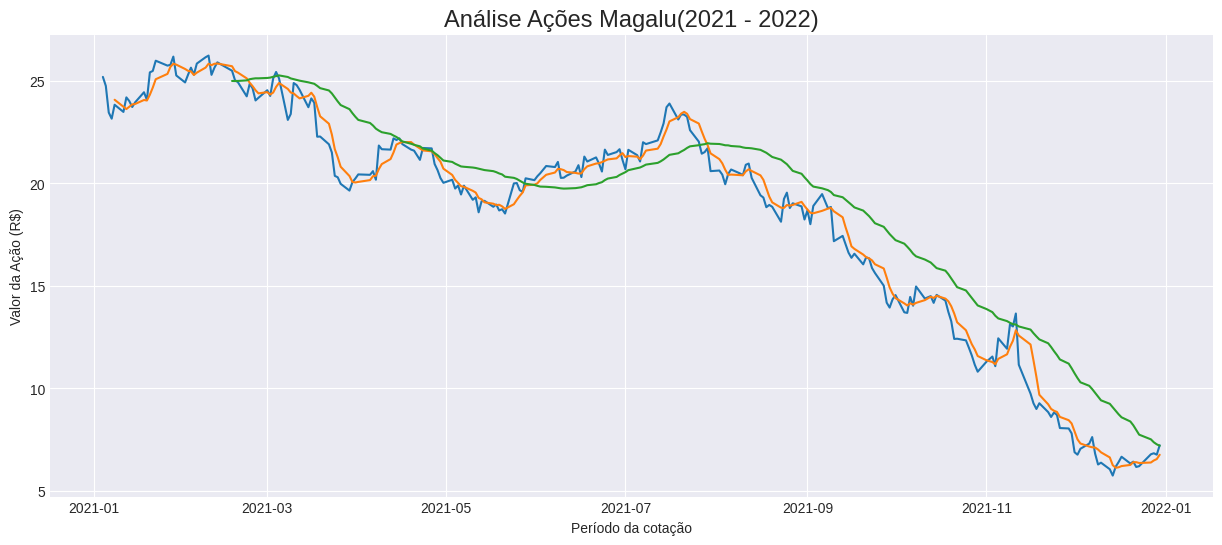

In [58]:
Media_Movel = Dados['Fechamento'].rolling(5).mean()
Media_Tendencia = Dados['Fechamento'].rolling(30).mean()

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15, 6))
plt.plot(Dados.index, Dados['Fechamento'])
plt.plot(Dados.index, Media_Movel)
plt.plot(Dados.index, Media_Tendencia)
plt.title('Análise Ações Magalu(2021 - 2022)', fontsize = 17)
plt.xlabel('Período da cotação')
plt.ylabel('Valor da Ação (R$)')

<Axes: xlabel='Mes', ylabel='Fechamento'>

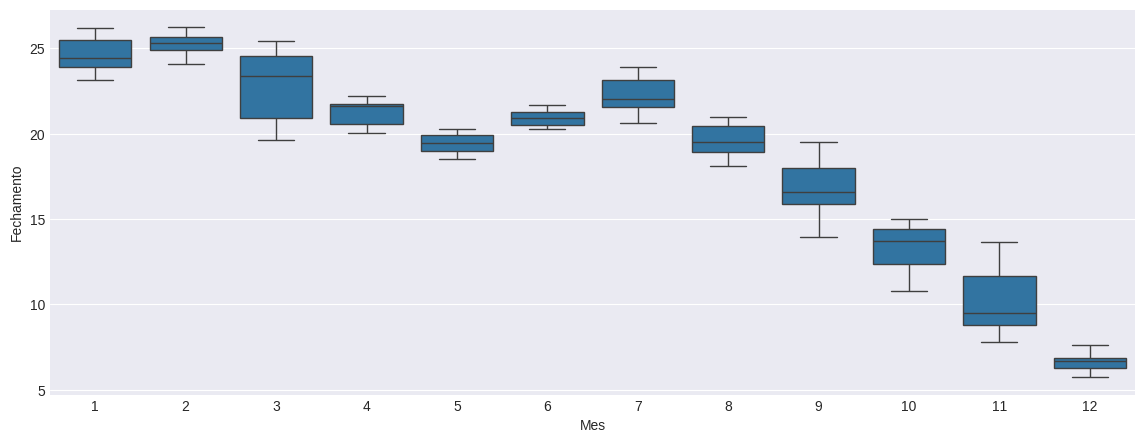

In [67]:
df['Mes'] = df['Data'].dt.month
plt.figure(figsize=(14, 5))
sns.boxplot(data = df, x='Mes', y='Fechamento')

In [70]:
Grafico = go.Figure(
    ata = [
        go.Candlestick(
        x = Dados.index,
        open = Dados['Abertura'],
        high = Dados['Maior'],
        low = Dados['Menor'],
        close = Dados['Fechamento']
    )

  ]
)

Grafico.show()